### Graph
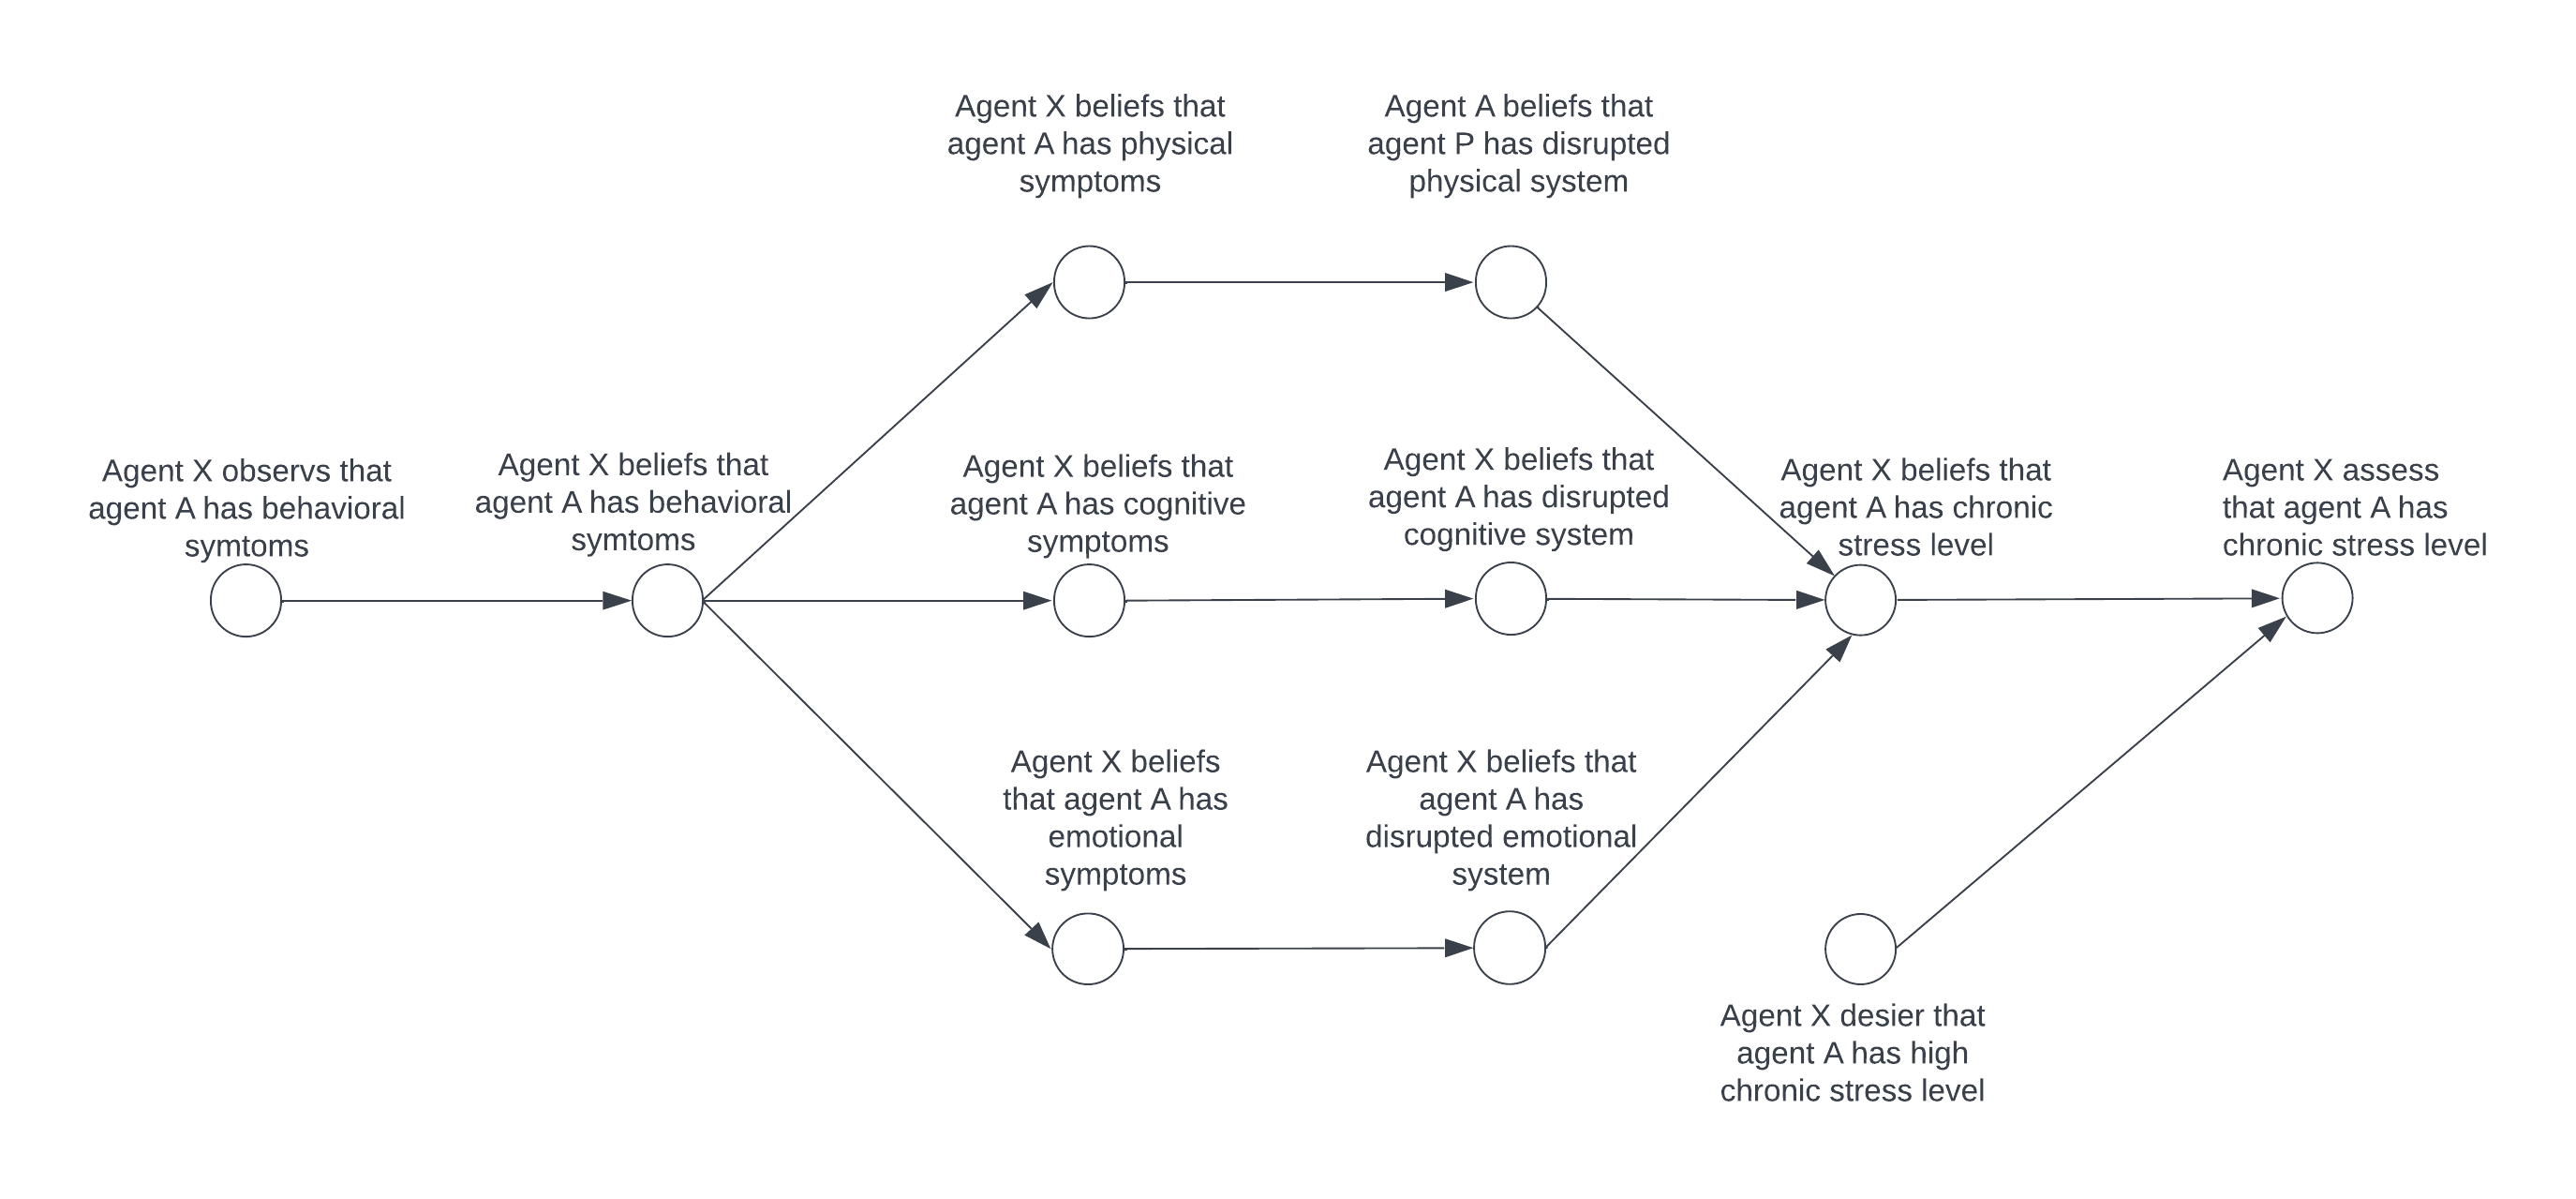

In [ ]:
from l2 import StateMachine, INF,Predicate
state_machine = StateMachine()

### Sorts

In [ ]:
state_machine.sorts = {
    "AGENT" : ["stressed_agent", "not_stressed_agent"],
    "LEVEL" : ["low", "high"]
}

The StateMachine contains the following defined sorts, besides BOOLEAN and REAL: 
+-----------+------------------------------------+
| Sort name |            Sort values             |
+-----------+------------------------------------+
|   AGENT   | stressed_agent, not_stressed_agent |
|   LEVEL   |             low, high              |
+-----------+------------------------------------+


### Predicates

In [ ]:
state_machine.predicates = {
    "has_behavioral_symptoms" : ["AGENT", "BOOLEAN"],
    "has_physical_symptoms" : ["AGENT", "BOOLEAN"],
    "has_cognitive_symptoms" : ["AGENT", "BOOLEAN"],
    "has_emotional_symptoms" : ["AGENT", "BOOLEAN"],
    "disrupted_physical_system_level" : ["AGENT", "LEVEL"],
    "disrupted_cognitive_system_level" : ["AGENT", "LEVEL"],
    "disrupted_emotional_system_level" : ["AGENT", "LEVEL"],
    "chronic_stress_level" : ["AGENT", "LEVEL"],
    "observed" : ["PREDICATE"],
    "belief" : ["PREDICATE"],
    "desire" : ["PREDICATE"],
    "assessment" : ["PREDICATE"] 
}


The StateMachine contains the following predicates with their corresponding sorts: 
+----------------------------------+----------------------+
|          Predicate name          |        Sorts         |
+----------------------------------+----------------------+
|     has_behavioral_symptoms      | ['AGENT', 'BOOLEAN'] |
|      has_physical_symptoms       | ['AGENT', 'BOOLEAN'] |
|      has_cognitive_symptoms      | ['AGENT', 'BOOLEAN'] |
|      has_emotional_symptoms      | ['AGENT', 'BOOLEAN'] |
| disrupted_physical_system_level  |  ['AGENT', 'LEVEL']  |
| disrupted_cognitive_system_level |  ['AGENT', 'LEVEL']  |
| disrupted_emotional_system_level |  ['AGENT', 'LEVEL']  |
|       chronic_stress_level       |  ['AGENT', 'LEVEL']  |
|             observed             |    ['PREDICATE']     |
|              belief              |    ['PREDICATE']     |
|              desire              |    ['PREDICATE']     |
|            assessment            |    ['PREDICATE']     |
+--------------

### Scenario

In [ ]:
state_machine.scenario = [
    ('observed', ('has_behavioral_symptoms', ('stressed_agent', True)), [1, INF]),
    ('observed', ('has_behavioral_symptoms', ('not_stressed_agent', False)), [1, INF]),
    ('desire', ('chronic_stress_level', ('stressed_agent', 'high')), [1, INF]), 
    ('desire', ('chronic_stress_level', ('not_stressed_agent', 'low')), [1, INF])
]

### Rules

In [ ]:
def observation_to_belief(states, t):
    """
        set observations to beliefs
        observed : {observations ...}
        belief : {beliefs ...}
    """
    previous_state = states[t - 1]
    
    observations = previous_state.retrieve_observations()
    # print(f"t:{t} obs: {observations}")
    if observations:
        for predicate in observations:
            for nested_predicate in observations[predicate]:
                agents = nested_predicate.agents
                value = nested_predicate.value
                # print(agents)
                new_belief = Predicate(predicate, agents, value)
                states[t].add_nested_predicate_to_state("belief", predicate, new_belief)

In [ ]:
def chronic_stress_level(states, t):
    '''
            Generating the beliefs of 
                physical_symptoms, cognitive_symptoms, emotional_symptoms
                disrupted_physical_systems, disrupted_cognitive_systems, disrupted_emotional_systems
                chronic_stress_level
    '''
    previous_state = states[t - 1]
    
    belief = previous_state.retrieve_beliefs()
    if belief and "has_behavioral_symptoms" in belief:
        for predicates in belief["has_behavioral_symptoms"]:
            agent = predicates.get_name_agent(0)
            belief_behavioral = predicates.get_value()
            
            belief_physical_symptoms = False
            belief_cognitive_symptoms = False
            belief_emotional_symptoms = False

            belief_disrupted_physical_systems = "low"
            belief_disrupted_cognitive_systems = "low"
            belief_disrupted_emotional_systems = "low"

            belief_chronic_stress_level = "low"
            
            if(belief_behavioral):
                belief_physical_symptoms = True
                belief_cognitive_symptoms = True
                belief_emotional_symptoms = True

                belief_disrupted_physical_systems = "high"
                belief_disrupted_cognitive_systems = "high"
                belief_disrupted_emotional_systems = "high"

                belief_chronic_stress_level = "high"

            add_new_predicate(states, t, "has_physical_symptoms", agent, belief_physical_symptoms)
            add_new_predicate(states, t, "has_cognitive_symptoms", agent, belief_cognitive_symptoms)
            add_new_predicate(states, t, "has_emotional_symptoms", agent, belief_emotional_symptoms)

            add_new_predicate(states, t, "disrupted_physical_system_level", agent, belief_disrupted_physical_systems)
            add_new_predicate(states, t, "disrupted_cognitive_system_level", agent, belief_disrupted_cognitive_systems)
            add_new_predicate(states, t, "disrupted_emotional_system_level", agent, belief_disrupted_emotional_systems)

            add_new_predicate(states, t, "chronic_stress_level", agent, belief_chronic_stress_level )

            
def add_new_predicate(states, t, name, agent, belief):
    new_predicate = Predicate(name, [agent], belief)
    states[t].add_nested_predicate_to_state("belief", name, new_predicate)
            


In [ ]:
def assesment_of_chronic_stress_level(states, t):
    previous_state = states[t-1]
    beliefs = previous_state.retrieve_beliefs()
    desires = previous_state.get_nested_predicate("desire", "chronic_stress_level")
    if beliefs and "chronic_stress_level" in beliefs and desires:
        belief_chrronic_stress = beliefs["chronic_stress_level"]
        for desire in desires:
            agent = desire.get_name_agent(0)
            desire_chronic_stress = desire.get_value()

            assess_chronic_stress = "low"

            if desire_chronic_stress == "high" and belief_chrronic_stress:
                assess_chronic_stress = "high"

            assessment_predicate = Predicate("chronic_stress_level", [agent], assess_chronic_stress)
            states[t].add_nested_predicate_to_state("assessment", "chronic_stress_level", assessment_predicate)
            

In [ ]:
rules = [observation_to_belief, chronic_stress_level, assesment_of_chronic_stress_level]

### Run

In [ ]:
state_machine.rules = rules

In [ ]:
state_machine.run()
# Don't forget about debug mode!
#state_machine.run(debug_mode=True)

In [ ]:
from l2 import run_visualization

The following predicates will be visualized:
observed_has_behavioral_symptoms
desire_chronic_stress_level
belief_has_behavioral_symptoms
belief_has_physical_symptoms
belief_has_cognitive_symptoms
belief_has_emotional_symptoms
belief_disrupted_physical_system_level
belief_disrupted_cognitive_system_level
belief_disrupted_emotional_system_level
belief_chronic_stress_level
assessment_chronic_stress_level


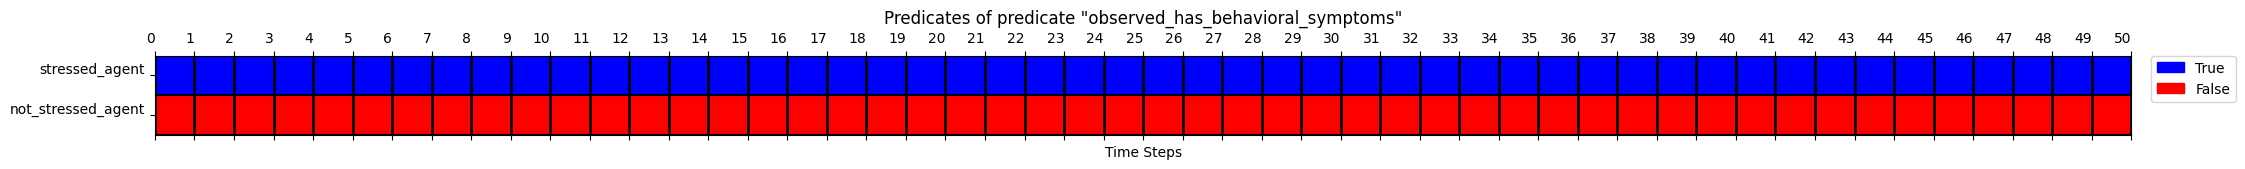

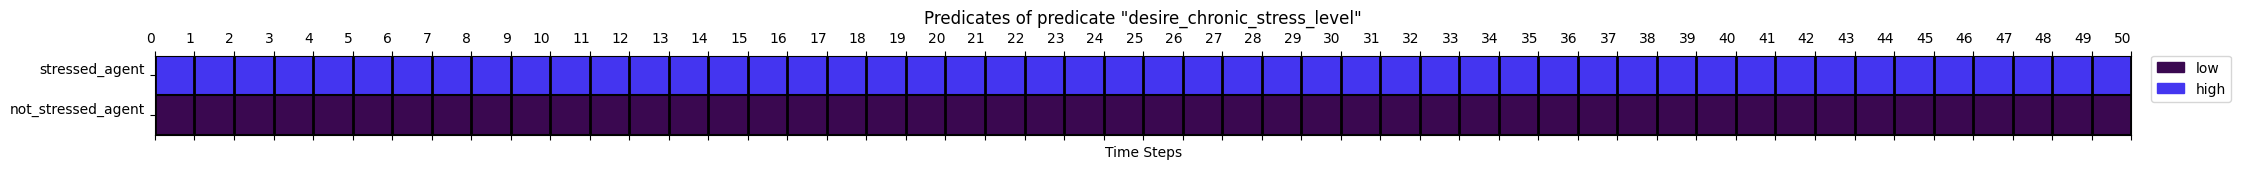

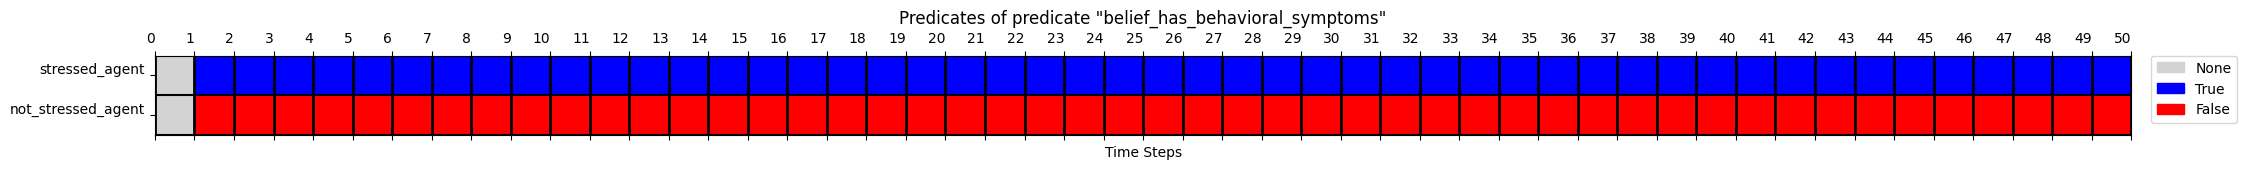

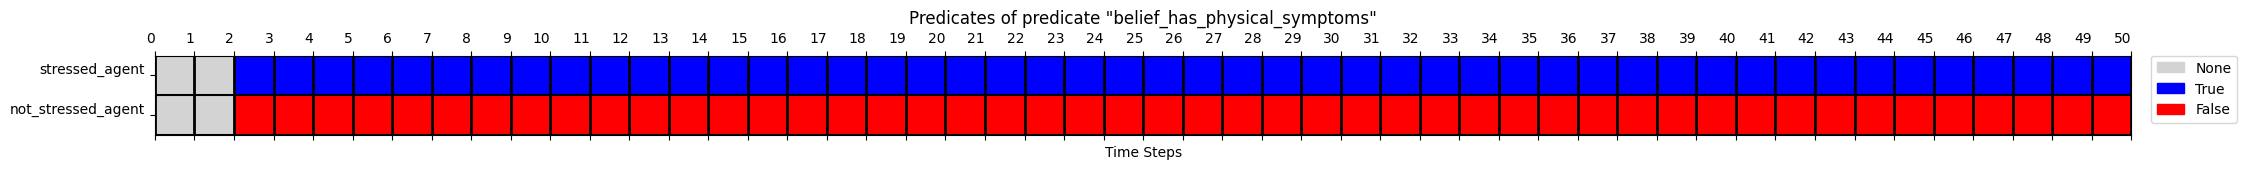

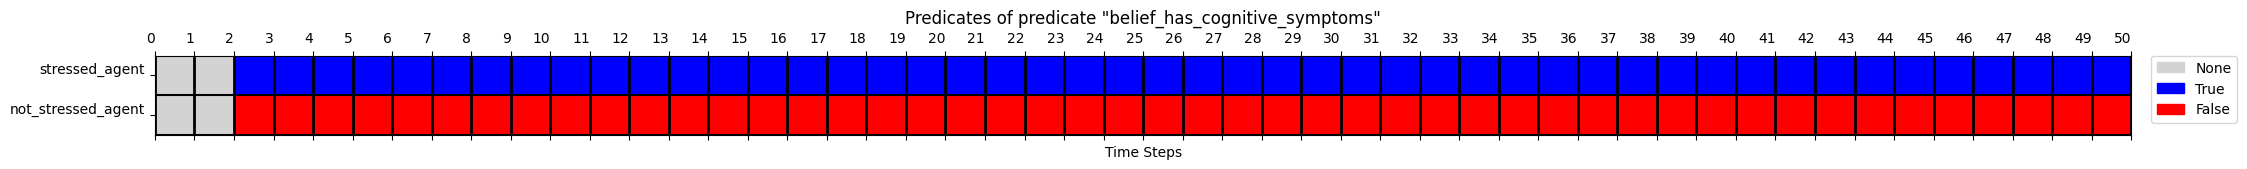

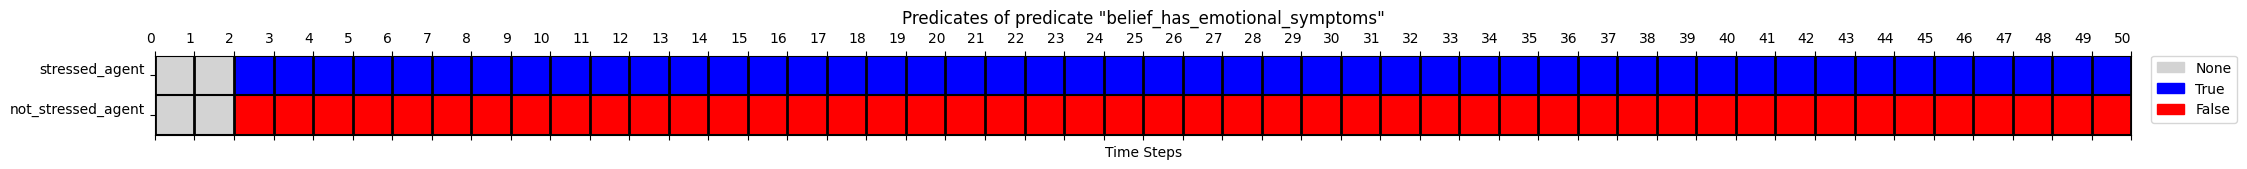

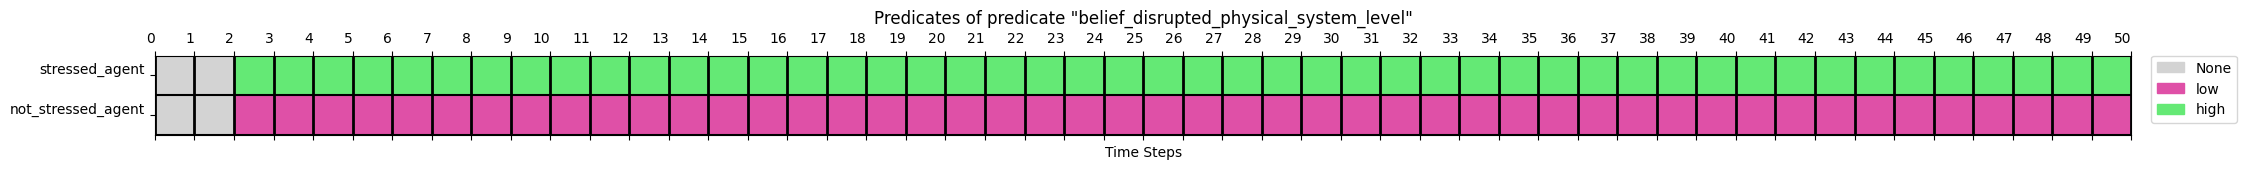

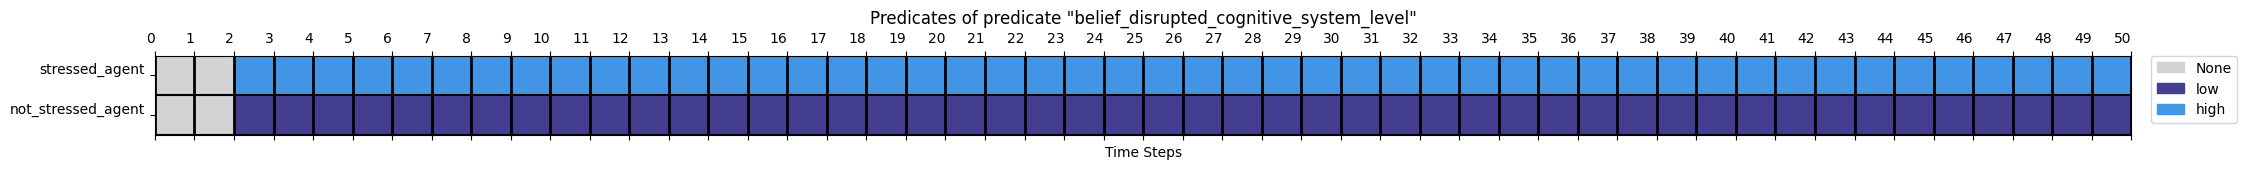

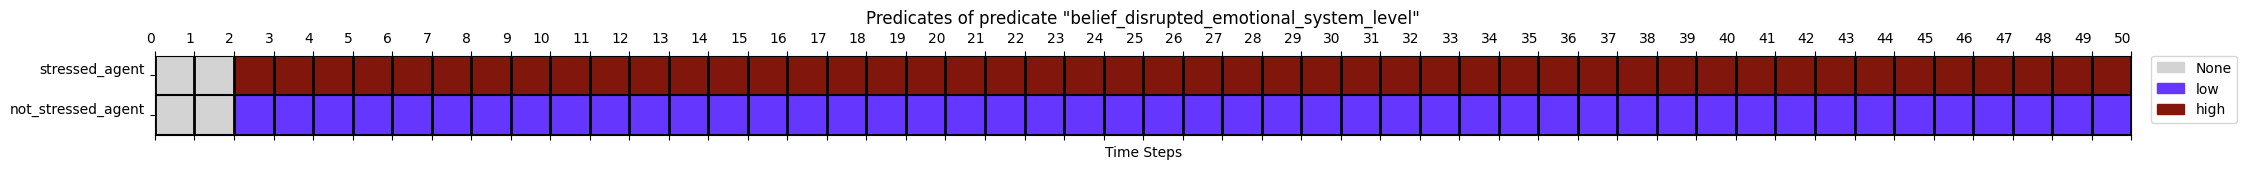

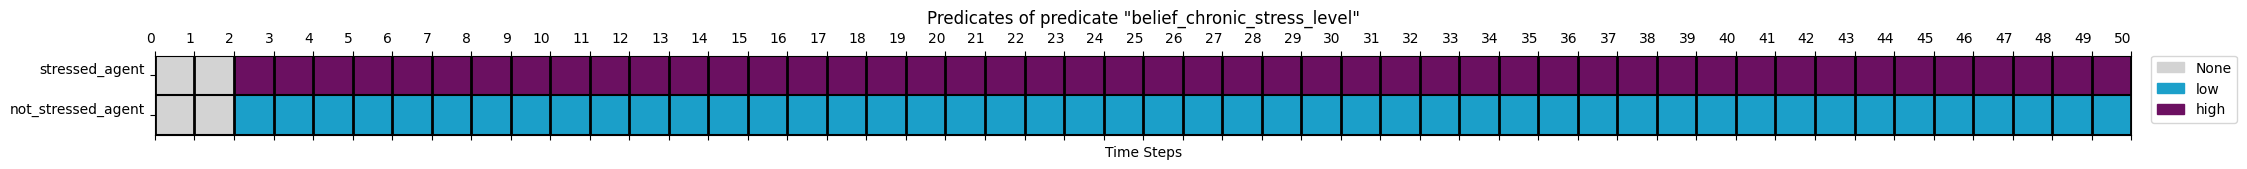

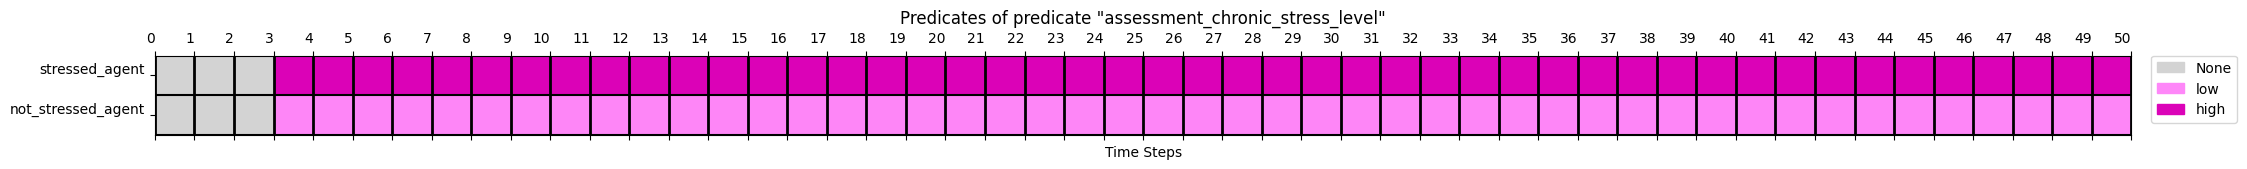

In [ ]:
run_visualization(state_machine)
